In [2]:
import pandas as pd
import numpy as np
from scipy import sparse
from sklearn.preprocessing import normalize
import time
from tqdm.notebook import tqdm
import datetime
import os
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
train_joke_df = pd.read_csv(r'data\recsys-in-practice\train_joke_df.csv')
test_joke_df_nofactrating = pd.read_csv(r'data\recsys-in-practice\test_joke_df_nofactrating.csv', index_col=0)
sample_submission = pd.read_csv(r'data\recsys-in-practice\sample_submission.csv')

In [4]:
train_joke_df

,UID,JID,Rating
0,18029,6,-1.26
1,3298,64,-4.17
2,3366,58,0.92
3,12735,92,3.69
4,11365,38,-6.60
...,...,...,...
1448359,22604,26,2.82
1448360,22255,36,-1.94
1448361,21056,40,-9.56
1448362,12328,97,0.87


In [5]:
test_joke_df_nofactrating

,UID,JID
InteractionID,,
0,11228,39
1,21724,85
2,16782,56
3,12105,42
4,14427,2
...,...,...
362086,3085,66
362087,13765,31
362088,10341,29


In [6]:
sample_submission

,InteractionID,Rating
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
362086,362086,0.0
362087,362087,0.0
362088,362088,0.0
362089,362089,0.0


In [7]:
users_count = np.unique(test_joke_df_nofactrating["UID"]).size
jokes_count = np.unique(test_joke_df_nofactrating["JID"]).size
users_count, jokes_count

(24983, 100)

In [8]:
users_count = np.unique(train_joke_df["UID"]).size
jokes_count = np.unique(train_joke_df["JID"]).size
users_count, jokes_count

(24983, 100)

In [9]:
#rating = train_joke_df['Rating'].values
#print(np.min(rating), np.max(np.abs(rating)), np.max(np.abs(rating)))

#rating_norm = (rating - np.min(rating)) / (np.max(rating) - np.min(rating))
#rating_norm = rating / np.max(np.abs(rating))
#print(np.min(rating_norm), np.max(rating_norm))

In [10]:
#train_joke_df['Rating_norm'] = rating_norm
#X = np.zeros((users_count, jokes_count))

#for row in tqdm(train_joke_df.values):
#    user_id = int(row[0]) - 1
#    joke_id = int(row[1]) - 1
    
#    rating = row[3]
    
#    X[user_id, joke_id] = rating

In [11]:
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn

In [12]:
class FeaturesDataset(Dataset):
    def __init__(self, features):
        self.features = features
            
    def __getitem__(self, index: int):            
        return torch.tensor(self.features[index], dtype=torch.float).to(device)
    
    def __len__(self):
        return len(self.features)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
train_df, test_df = train_test_split(train_joke_df, test_size=0.5, random_state=42)

In [15]:
train_df.groupby("UID").count().mean()

JID       28.986991
Rating    28.986991
dtype: float64

In [16]:
test_df.groupby("UID").count().mean()

JID       28.986991
Rating    28.986991
dtype: float64

In [17]:
np.unique(train_df["UID"]).size, np.unique(train_df["JID"]).size

(24983, 100)

In [18]:
np.unique(test_df["UID"]).size, np.unique(test_df["JID"]).size

(24983, 100)

In [19]:
#np.unique(train_df["Rating"])

In [20]:
#np.unique(test_df["Rating"])

In [21]:
sorted(Counter(train_df["Rating"]).items(), key=lambda item: item[1], reverse=True)

[(-0.29, 5822),
 (2.62, 2969),
 (-0.49, 2934),
 (5.73, 2934),
 (-0.39, 2896),
 (2.82, 2890),
 (-0.53, 2871),
 (-0.44, 2868),
 (3.2, 2859),
 (4.17, 2821),
 (-0.34, 2772),
 (3.01, 2725),
 (8.83, 2704),
 (-0.24, 2693),
 (2.77, 2658),
 (2.43, 2641),
 (3.16, 2640),
 (2.96, 2640),
 (-0.58, 2631),
 (3.4, 2609),
 (2.72, 2606),
 (2.91, 2602),
 (1.07, 2596),
 (3.11, 2593),
 (3.25, 2593),
 (2.23, 2579),
 (3.59, 2571),
 (1.46, 2559),
 (2.57, 2557),
 (3.3, 2550),
 (3.64, 2544),
 (4.37, 2542),
 (3.45, 2541),
 (3.83, 2538),
 (7.28, 2532),
 (3.54, 2524),
 (3.06, 2523),
 (1.26, 2517),
 (-0.63, 2514),
 (-0.19, 2511),
 (3.35, 2509),
 (2.86, 2507),
 (3.79, 2501),
 (3.5, 2496),
 (2.38, 2494),
 (2.52, 2482),
 (9.03, 2481),
 (2.18, 2473),
 (-0.68, 2470),
 (2.67, 2460),
 (2.09, 2455),
 (2.48, 2450),
 (3.98, 2445),
 (1.65, 2436),
 (1.99, 2432),
 (1.7, 2426),
 (-0.15, 2425),
 (1.84, 2425),
 (1.21, 2423),
 (2.33, 2419),
 (3.69, 2419),
 (-0.1, 2418),
 (3.74, 2417),
 (2.28, 2416),
 (1.94, 2412),
 (2.14, 2404),
 (1

In [22]:
sorted(Counter(test_df["Rating"]).items(), key=lambda item: item[1], reverse=True)

[(-0.29, 5660),
 (2.62, 2963),
 (-0.39, 2962),
 (5.73, 2913),
 (-0.44, 2903),
 (-0.49, 2877),
 (-0.53, 2866),
 (2.82, 2838),
 (-0.34, 2833),
 (4.17, 2791),
 (3.01, 2755),
 (3.2, 2728),
 (8.83, 2710),
 (3.4, 2686),
 (3.35, 2674),
 (2.96, 2673),
 (-0.58, 2654),
 (3.16, 2639),
 (2.57, 2623),
 (1.07, 2613),
 (3.59, 2607),
 (2.86, 2600),
 (2.43, 2595),
 (2.38, 2582),
 (2.77, 2579),
 (3.06, 2577),
 (3.11, 2569),
 (2.23, 2566),
 (1.26, 2563),
 (-0.24, 2559),
 (2.72, 2550),
 (3.79, 2539),
 (1.46, 2538),
 (3.25, 2538),
 (3.54, 2537),
 (3.5, 2536),
 (3.45, 2528),
 (2.67, 2525),
 (7.28, 2523),
 (2.48, 2522),
 (-0.63, 2517),
 (-0.19, 2511),
 (2.52, 2510),
 (3.3, 2508),
 (1.84, 2487),
 (2.91, 2475),
 (9.03, 2474),
 (3.64, 2469),
 (1.17, 2466),
 (2.04, 2453),
 (2.33, 2453),
 (3.69, 2452),
 (-0.68, 2450),
 (1.65, 2441),
 (2.18, 2441),
 (3.74, 2439),
 (1.99, 2429),
 (2.09, 2425),
 (3.93, 2422),
 (1.12, 2412),
 (1.6, 2402),
 (1.94, 2401),
 (3.98, 2400),
 (1.8, 2394),
 (3.83, 2391),
 (0.68, 2380),
 (2.2

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

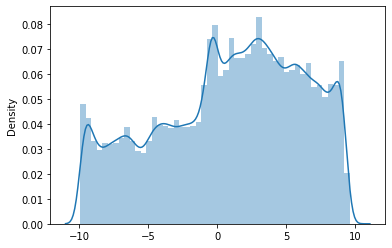

In [23]:
sns.distplot(train_df['Rating'].values)

C:\ProgramData\Anaconda3\envs\torchvision\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

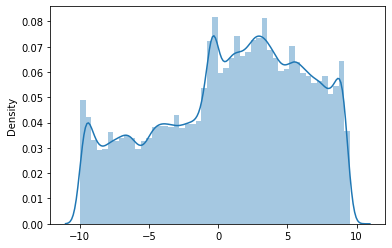

In [24]:
sns.distplot(test_df['Rating'].values)

In [25]:
X_train = np.zeros((users_count, jokes_count))

for row in tqdm(train_df.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X_train[user_id, joke_id] = rating

  0%|          | 0/724182 [00:00<?, ?it/s]

In [26]:
X_test = np.zeros((users_count, jokes_count))

for row in tqdm(test_df.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X_test[user_id, joke_id] = rating

  0%|          | 0/724182 [00:00<?, ?it/s]

In [27]:
#X_train, X_test = train_test_split(X, test_size=0.15, random_state=42)
#X_train.shape, X_test.shape

In [28]:
dataset_train = FeaturesDataset(X_train)
dataset_test = FeaturesDataset(X_test)

In [29]:
import torch

In [30]:
device = "cpu"#"cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [31]:
def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']


def save(model, name):
    os.mkdir(f"artifacts1/{name}")
    #torch.save(model, f"{name}/model.pkl")
    torch.save(model.state_dict(), f"artifacts1/{name}/checkpoint.pth")
    
def load(name):
    return torch.load(f"artifacts1/{name}/model.pkl")


def load2(name, model):
    model.load_state_dict(torch.load(f"artifacts1/{name}/checkpoint.pth"))
    
def train_model(epoch_start, model, train_loader, val_loader, loss, optimizer, num_epochs, scheduler, loss_train_history, loss_val_history):
    best_loss = compute_accuracy(model, val_loader, loss)
    print('loss:', best_loss)
    bet_model_name = None
    for epoch in range(epoch_start, epoch_start + num_epochs):
        t1 = time.time()
        model.train()
        loss_accum = 0
        for i_step, x,in enumerate(train_loader):
            prediction = model(x)    
            loss_value = loss(prediction, x)
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()            
            loss_accum += loss_value
            
          
        ave_loss = loss_accum / (i_step + 1)
        loss_val = compute_accuracy(model, val_loader, loss)
        
        loss_train_history.append(float(ave_loss))
        loss_val_history.append(loss_val)
        
        if scheduler != None:
            scheduler.step()
        
        if loss_val < best_loss:
            best_loss = loss_val
            bet_model_name = f'{datetime.datetime.now().strftime("%d.%m.%Y_%H.%M.%S.%f")}_epoch_{epoch}_loss_{round(best_loss, 4)}'
            save(model, bet_model_name)
            print(f"saved {bet_model_name}")
            
        print("Epoch: %i lr: %f; Train loss: %f, Val loss: %f, time: %i s" % (epoch, get_lr(optimizer), ave_loss, loss_val,
                                                                            round(time.time() - t1)))
    return bet_model_name
        
    
def compute_accuracy(model, loader, loss):
    """
    Computes accuracy on the dataset wrapped in a loader    
    Returns: accuracy as a float value between 0 and 1
    """
    model.eval()
    loss_accum = 0
    for i_step, x in enumerate(loader):
        prediction = model(x)
        loss_value = loss(prediction, x)
        loss_accum += loss_value

    ave_loss = loss_accum / (i_step + 1)         
    return float(ave_loss)

In [32]:
class VAEModel(nn.Module):
    def __init__(self, input_shape, seed, ratings_range):
        super().__init__()
        self.seed = torch.manual_seed(seed)
        self.y_range = ratings_range
        
        shape = 64
        self.encode = nn.Sequential(
                nn.Linear(input_shape, shape),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape),
                nn.ReLU(inplace=True),    

                nn.Linear(shape, shape // 2),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape // 2),
                nn.ReLU(inplace=True),  
            
                nn.Linear(shape // 2, shape // 8),
                )


        self.decode = nn.Sequential(
                nn.Linear(shape // 8, shape // 2),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape // 2),
                nn.ReLU(inplace=True),         
            
                nn.Linear(shape // 2, shape),
                nn.Dropout(0.66),
                nn.BatchNorm1d(shape),
                nn.ReLU(inplace=True),  
            
                nn.Linear(shape, input_shape),
                )        
    def forward(self, x):
        embeddings = self.encode(x)
        result = self.decode(embeddings)
        return (torch.sigmoid(result) * (self.y_range[1] - self.y_range[0]) + self.y_range[0])
    
    
input_shape = X_train.shape[1]
display(input_shape)

nn_model = VAEModel(input_shape, seed=1024, ratings_range=[-10, 10]).to(device)

print(nn_model)

loss_train_history, loss_val_history = [], []

100

VAEModel(
  (encode): Sequential(
    (0): Linear(in_features=100, out_features=64, bias=True)
    (1): Dropout(p=0.66, inplace=False)
    (2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): Dropout(p=0.66, inplace=False)
    (6): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Linear(in_features=32, out_features=8, bias=True)
  )
  (decode): Sequential(
    (0): Linear(in_features=8, out_features=32, bias=True)
    (1): Dropout(p=0.66, inplace=False)
    (2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=32, out_features=64, bias=True)
    (5): Dropout(p=0.66, inplace=False)
    (6): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): ReLU(inplace=True)
    (8): Li

In [33]:
for x in tqdm(DataLoader(dataset_train, batch_size=8)):
    break
print(x.shape)
nn_model(x).shape

  0%|          | 0/3123 [00:00<?, ?it/s]

torch.Size([8, 100])


torch.Size([8, 100])

In [34]:
def RMSE_loss(prediction, target):
    return torch.sqrt(nn.MSELoss()(prediction, target))

In [34]:
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.9)


bet_model_name = train_model(0,
    nn_model, 
    DataLoader(dataset_train, batch_size=100000),
    DataLoader(dataset_test, batch_size=100000),
    RMSE_loss, optimizer, 1000, scheduler, loss_train_history, loss_val_history)
print('end!')
print(bet_model_name)

loss: 2.9184744358062744
saved 22.04.2023_15.58.36.385587_epoch_0_loss_2.9119
Epoch: 0 lr: 0.001000; Train loss: 3.470762, Val loss: 2.911947, time: 2 s
saved 22.04.2023_15.58.36.817184_epoch_1_loss_2.9072
Epoch: 1 lr: 0.001000; Train loss: 3.432608, Val loss: 2.907233, time: 0 s
saved 22.04.2023_15.58.37.330105_epoch_2_loss_2.9034
Epoch: 2 lr: 0.001000; Train loss: 3.396365, Val loss: 2.903437, time: 1 s
saved 22.04.2023_15.58.37.770752_epoch_3_loss_2.9
Epoch: 3 lr: 0.001000; Train loss: 3.366112, Val loss: 2.900046, time: 0 s
saved 22.04.2023_15.58.38.307780_epoch_4_loss_2.8967
Epoch: 4 lr: 0.000900; Train loss: 3.330205, Val loss: 2.896741, time: 1 s
saved 22.04.2023_15.58.38.779942_epoch_5_loss_2.8936
Epoch: 5 lr: 0.000900; Train loss: 3.299147, Val loss: 2.893576, time: 0 s
saved 22.04.2023_15.58.39.309359_epoch_6_loss_2.8904
Epoch: 6 lr: 0.000900; Train loss: 3.273511, Val loss: 2.890379, time: 1 s
saved 22.04.2023_15.58.39.755123_epoch_7_loss_2.8871
Epoch: 7 lr: 0.000900; Train 

saved 22.04.2023_15.59.07.673278_epoch_64_loss_2.8111
Epoch: 64 lr: 0.000254; Train loss: 2.866189, Val loss: 2.811131, time: 0 s
saved 22.04.2023_15.59.08.198806_epoch_65_loss_2.8111
Epoch: 65 lr: 0.000254; Train loss: 2.865258, Val loss: 2.811054, time: 1 s
saved 22.04.2023_15.59.08.647887_epoch_66_loss_2.811
Epoch: 66 lr: 0.000254; Train loss: 2.863675, Val loss: 2.810993, time: 0 s
saved 22.04.2023_15.59.09.162390_epoch_67_loss_2.8109
Epoch: 67 lr: 0.000254; Train loss: 2.863347, Val loss: 2.810935, time: 1 s
saved 22.04.2023_15.59.09.620061_epoch_68_loss_2.8109
Epoch: 68 lr: 0.000254; Train loss: 2.861850, Val loss: 2.810915, time: 0 s
Epoch: 69 lr: 0.000229; Train loss: 2.860361, Val loss: 2.810917, time: 1 s
saved 22.04.2023_15.59.10.591591_epoch_70_loss_2.8108
Epoch: 70 lr: 0.000229; Train loss: 2.861475, Val loss: 2.810844, time: 0 s
Epoch: 71 lr: 0.000229; Train loss: 2.858722, Val loss: 2.810862, time: 1 s
saved 22.04.2023_15.59.11.629422_epoch_72_loss_2.8108
Epoch: 72 lr: 0

Epoch: 162 lr: 0.000034; Train loss: 2.832934, Val loss: 2.810897, time: 0 s
Epoch: 163 lr: 0.000034; Train loss: 2.833349, Val loss: 2.810914, time: 0 s
Epoch: 164 lr: 0.000031; Train loss: 2.832613, Val loss: 2.810891, time: 1 s
Epoch: 165 lr: 0.000031; Train loss: 2.832862, Val loss: 2.810925, time: 1 s
Epoch: 166 lr: 0.000031; Train loss: 2.831739, Val loss: 2.810979, time: 0 s
Epoch: 167 lr: 0.000031; Train loss: 2.833557, Val loss: 2.810992, time: 0 s
Epoch: 168 lr: 0.000031; Train loss: 2.832761, Val loss: 2.810982, time: 0 s
Epoch: 169 lr: 0.000028; Train loss: 2.832294, Val loss: 2.810971, time: 1 s
Epoch: 170 lr: 0.000028; Train loss: 2.831470, Val loss: 2.810976, time: 0 s
Epoch: 171 lr: 0.000028; Train loss: 2.831818, Val loss: 2.810950, time: 1 s
Epoch: 172 lr: 0.000028; Train loss: 2.832479, Val loss: 2.810934, time: 0 s
Epoch: 173 lr: 0.000028; Train loss: 2.831584, Val loss: 2.810997, time: 0 s
Epoch: 174 lr: 0.000025; Train loss: 2.833245, Val loss: 2.811006, time: 0 s

Epoch: 269 lr: 0.000003; Train loss: 2.829174, Val loss: 2.810997, time: 0 s
Epoch: 270 lr: 0.000003; Train loss: 2.829469, Val loss: 2.811052, time: 1 s
Epoch: 271 lr: 0.000003; Train loss: 2.828673, Val loss: 2.811068, time: 0 s
Epoch: 272 lr: 0.000003; Train loss: 2.830453, Val loss: 2.811057, time: 1 s
Epoch: 273 lr: 0.000003; Train loss: 2.828456, Val loss: 2.811057, time: 0 s
Epoch: 274 lr: 0.000003; Train loss: 2.829302, Val loss: 2.811068, time: 0 s
Epoch: 275 lr: 0.000003; Train loss: 2.828397, Val loss: 2.811079, time: 0 s
Epoch: 276 lr: 0.000003; Train loss: 2.829178, Val loss: 2.811054, time: 1 s
Epoch: 277 lr: 0.000003; Train loss: 2.829649, Val loss: 2.811059, time: 0 s
Epoch: 278 lr: 0.000003; Train loss: 2.827983, Val loss: 2.811057, time: 1 s
Epoch: 279 lr: 0.000003; Train loss: 2.830469, Val loss: 2.811068, time: 0 s
Epoch: 280 lr: 0.000003; Train loss: 2.829951, Val loss: 2.811042, time: 0 s
Epoch: 281 lr: 0.000003; Train loss: 2.828518, Val loss: 2.811048, time: 1 s

Epoch: 376 lr: 0.000000; Train loss: 2.828208, Val loss: 2.811187, time: 0 s
Epoch: 377 lr: 0.000000; Train loss: 2.828060, Val loss: 2.811148, time: 0 s
Epoch: 378 lr: 0.000000; Train loss: 2.828258, Val loss: 2.811120, time: 1 s
Epoch: 379 lr: 0.000000; Train loss: 2.828484, Val loss: 2.811111, time: 0 s
Epoch: 380 lr: 0.000000; Train loss: 2.828987, Val loss: 2.811124, time: 0 s
Epoch: 381 lr: 0.000000; Train loss: 2.828550, Val loss: 2.811151, time: 0 s
Epoch: 382 lr: 0.000000; Train loss: 2.828197, Val loss: 2.811183, time: 1 s
Epoch: 383 lr: 0.000000; Train loss: 2.828324, Val loss: 2.811188, time: 0 s
Epoch: 384 lr: 0.000000; Train loss: 2.828074, Val loss: 2.811192, time: 1 s
Epoch: 385 lr: 0.000000; Train loss: 2.828591, Val loss: 2.811110, time: 0 s
Epoch: 386 lr: 0.000000; Train loss: 2.828821, Val loss: 2.811087, time: 1 s
Epoch: 387 lr: 0.000000; Train loss: 2.828539, Val loss: 2.811112, time: 0 s
Epoch: 388 lr: 0.000000; Train loss: 2.828512, Val loss: 2.811143, time: 0 s

Epoch: 483 lr: 0.000000; Train loss: 2.827977, Val loss: 2.811214, time: 1 s
Epoch: 484 lr: 0.000000; Train loss: 2.828586, Val loss: 2.811222, time: 0 s
Epoch: 485 lr: 0.000000; Train loss: 2.828876, Val loss: 2.811181, time: 1 s
Epoch: 486 lr: 0.000000; Train loss: 2.828321, Val loss: 2.811127, time: 0 s
Epoch: 487 lr: 0.000000; Train loss: 2.828044, Val loss: 2.811155, time: 1 s
Epoch: 488 lr: 0.000000; Train loss: 2.828812, Val loss: 2.811206, time: 1 s
Epoch: 489 lr: 0.000000; Train loss: 2.829342, Val loss: 2.811202, time: 0 s
Epoch: 490 lr: 0.000000; Train loss: 2.828653, Val loss: 2.811202, time: 1 s
Epoch: 491 lr: 0.000000; Train loss: 2.827691, Val loss: 2.811234, time: 0 s
Epoch: 492 lr: 0.000000; Train loss: 2.828880, Val loss: 2.811197, time: 0 s
Epoch: 493 lr: 0.000000; Train loss: 2.829777, Val loss: 2.811249, time: 0 s
Epoch: 494 lr: 0.000000; Train loss: 2.829205, Val loss: 2.811219, time: 1 s
Epoch: 495 lr: 0.000000; Train loss: 2.829524, Val loss: 2.811220, time: 0 s

Epoch: 590 lr: 0.000000; Train loss: 2.829289, Val loss: 2.811177, time: 0 s
Epoch: 591 lr: 0.000000; Train loss: 2.827573, Val loss: 2.811190, time: 0 s
Epoch: 592 lr: 0.000000; Train loss: 2.828584, Val loss: 2.811272, time: 0 s
Epoch: 593 lr: 0.000000; Train loss: 2.828953, Val loss: 2.811251, time: 1 s
Epoch: 594 lr: 0.000000; Train loss: 2.827678, Val loss: 2.811172, time: 0 s
Epoch: 595 lr: 0.000000; Train loss: 2.830256, Val loss: 2.811145, time: 0 s
Epoch: 596 lr: 0.000000; Train loss: 2.828338, Val loss: 2.811156, time: 0 s
Epoch: 597 lr: 0.000000; Train loss: 2.828304, Val loss: 2.811228, time: 1 s
Epoch: 598 lr: 0.000000; Train loss: 2.829682, Val loss: 2.811219, time: 0 s
Epoch: 599 lr: 0.000000; Train loss: 2.828288, Val loss: 2.811236, time: 1 s
Epoch: 600 lr: 0.000000; Train loss: 2.829172, Val loss: 2.811164, time: 0 s
Epoch: 601 lr: 0.000000; Train loss: 2.829834, Val loss: 2.811172, time: 1 s
Epoch: 602 lr: 0.000000; Train loss: 2.828871, Val loss: 2.811174, time: 1 s

Epoch: 697 lr: 0.000000; Train loss: 2.828598, Val loss: 2.811206, time: 1 s
Epoch: 698 lr: 0.000000; Train loss: 2.830595, Val loss: 2.811195, time: 0 s
Epoch: 699 lr: 0.000000; Train loss: 2.829626, Val loss: 2.811240, time: 1 s
Epoch: 700 lr: 0.000000; Train loss: 2.827555, Val loss: 2.811203, time: 0 s
Epoch: 701 lr: 0.000000; Train loss: 2.828877, Val loss: 2.811226, time: 1 s
Epoch: 702 lr: 0.000000; Train loss: 2.829073, Val loss: 2.811242, time: 0 s
Epoch: 703 lr: 0.000000; Train loss: 2.829319, Val loss: 2.811239, time: 1 s
Epoch: 704 lr: 0.000000; Train loss: 2.828941, Val loss: 2.811299, time: 0 s
Epoch: 705 lr: 0.000000; Train loss: 2.829207, Val loss: 2.811319, time: 1 s
Epoch: 706 lr: 0.000000; Train loss: 2.829055, Val loss: 2.811251, time: 0 s
Epoch: 707 lr: 0.000000; Train loss: 2.828771, Val loss: 2.811258, time: 1 s
Epoch: 708 lr: 0.000000; Train loss: 2.829137, Val loss: 2.811288, time: 0 s
Epoch: 709 lr: 0.000000; Train loss: 2.828553, Val loss: 2.811304, time: 1 s

Epoch: 804 lr: 0.000000; Train loss: 2.829054, Val loss: 2.811214, time: 1 s
Epoch: 805 lr: 0.000000; Train loss: 2.828132, Val loss: 2.811233, time: 0 s
Epoch: 806 lr: 0.000000; Train loss: 2.829204, Val loss: 2.811229, time: 0 s
Epoch: 807 lr: 0.000000; Train loss: 2.828002, Val loss: 2.811183, time: 0 s
Epoch: 808 lr: 0.000000; Train loss: 2.829628, Val loss: 2.811199, time: 0 s
Epoch: 809 lr: 0.000000; Train loss: 2.830510, Val loss: 2.811162, time: 0 s
Epoch: 810 lr: 0.000000; Train loss: 2.828197, Val loss: 2.811245, time: 0 s
Epoch: 811 lr: 0.000000; Train loss: 2.829076, Val loss: 2.811257, time: 0 s
Epoch: 812 lr: 0.000000; Train loss: 2.828787, Val loss: 2.811275, time: 0 s
Epoch: 813 lr: 0.000000; Train loss: 2.828702, Val loss: 2.811256, time: 0 s
Epoch: 814 lr: 0.000000; Train loss: 2.828662, Val loss: 2.811286, time: 0 s
Epoch: 815 lr: 0.000000; Train loss: 2.829233, Val loss: 2.811270, time: 1 s
Epoch: 816 lr: 0.000000; Train loss: 2.828750, Val loss: 2.811332, time: 0 s

Epoch: 911 lr: 0.000000; Train loss: 2.828420, Val loss: 2.811160, time: 0 s
Epoch: 912 lr: 0.000000; Train loss: 2.828312, Val loss: 2.811237, time: 0 s
Epoch: 913 lr: 0.000000; Train loss: 2.827702, Val loss: 2.811293, time: 0 s
Epoch: 914 lr: 0.000000; Train loss: 2.828996, Val loss: 2.811212, time: 0 s
Epoch: 915 lr: 0.000000; Train loss: 2.828836, Val loss: 2.811136, time: 0 s
Epoch: 916 lr: 0.000000; Train loss: 2.829068, Val loss: 2.811120, time: 0 s
Epoch: 917 lr: 0.000000; Train loss: 2.828587, Val loss: 2.811100, time: 0 s
Epoch: 918 lr: 0.000000; Train loss: 2.829939, Val loss: 2.811070, time: 0 s
Epoch: 919 lr: 0.000000; Train loss: 2.828593, Val loss: 2.811098, time: 0 s
Epoch: 920 lr: 0.000000; Train loss: 2.828710, Val loss: 2.811133, time: 0 s
Epoch: 921 lr: 0.000000; Train loss: 2.829282, Val loss: 2.811076, time: 0 s
Epoch: 922 lr: 0.000000; Train loss: 2.830235, Val loss: 2.811152, time: 0 s
Epoch: 923 lr: 0.000000; Train loss: 2.828369, Val loss: 2.811133, time: 0 s

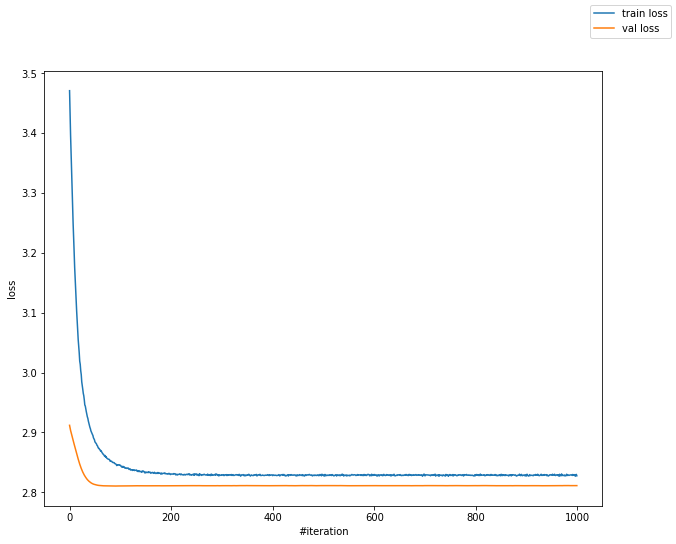

In [35]:
fig = plt.figure(figsize=(10, 8))    
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
fig.legend()
plt.show()

In [36]:
assert False

AssertionError: 

In [ ]:
assert False

In [37]:
X = np.zeros((users_count, jokes_count))

for row in tqdm(train_joke_df.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X[user_id, joke_id] = rating

  0%|          | 0/1448364 [00:00<?, ?it/s]

In [38]:
dataset = FeaturesDataset(X)

In [39]:
best_model_name = '22.04.2023_15.59.20.180906_epoch_90_loss_2.8106'

In [42]:
best_model = VAEModel(input_shape, seed=1024, ratings_range=[-10, 10]).to(device)
print(compute_accuracy(best_model, DataLoader(dataset_test, batch_size=300), RMSE_loss))

load2(best_model_name, best_model)
print(compute_accuracy(best_model, DataLoader(dataset_test, batch_size=300), RMSE_loss))

2.9243545532226562
2.8096976280212402


In [46]:
optimizer = torch.optim.Adam(nn_model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)


bet_model_name = train_model(300,
    nn_model, 
    DataLoader(dataset_train, batch_size=100000),
    DataLoader(dataset_test, batch_size=100000),
    RMSE_loss, optimizer, 20, scheduler, loss_train_history, loss_val_history)
print('end!')
print(bet_model_name)

loss: 2.914125442504883
Epoch: 300 lr: 0.000100; Train loss: 3.415533, Val loss: 2.914273, time: 0 s
Epoch: 301 lr: 0.000100; Train loss: 3.408678, Val loss: 2.914379, time: 0 s
Epoch: 302 lr: 0.000100; Train loss: 3.409009, Val loss: 2.914404, time: 1 s
Epoch: 303 lr: 0.000100; Train loss: 3.405761, Val loss: 2.914389, time: 0 s
Epoch: 304 lr: 0.000080; Train loss: 3.401169, Val loss: 2.914366, time: 1 s
Epoch: 305 lr: 0.000080; Train loss: 3.396678, Val loss: 2.914424, time: 0 s
Epoch: 306 lr: 0.000080; Train loss: 3.393730, Val loss: 2.914448, time: 1 s
Epoch: 307 lr: 0.000080; Train loss: 3.391331, Val loss: 2.914364, time: 0 s
Epoch: 308 lr: 0.000080; Train loss: 3.386064, Val loss: 2.914294, time: 1 s
Epoch: 309 lr: 0.000064; Train loss: 3.384434, Val loss: 2.914248, time: 0 s
Epoch: 310 lr: 0.000064; Train loss: 3.383176, Val loss: 2.914154, time: 1 s
saved 23.04.2023_13.15.31.579580_epoch_311_loss_2.9141
Epoch: 311 lr: 0.000064; Train loss: 3.380555, Val loss: 2.914089, time: 0

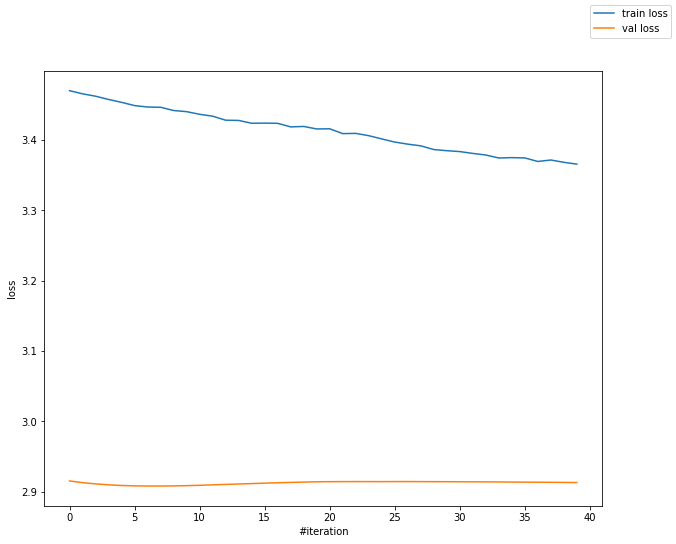

In [47]:
fig = plt.figure(figsize=(10, 8))    
plt.xlabel("#iteration")
plt.ylabel("loss")
plt.plot(loss_train_history, label='train loss')
plt.plot(loss_val_history, label='val loss')
fig.legend()
plt.show()

In [ ]:
X = np.zeros((users_count, jokes_count))

for row in tqdm(train_joke_df.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X_test[user_id, joke_id] = rating

In [ ]:
model2 = VAEModel(input_shape, seed=1024).to(device)
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))
model2.load_state_dict(torch.load("checkpoint.pth"))
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))

In [ ]:
model2 = VAEModel(input_shape, seed=1024).to(device)
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))
save(nn_model, '111')

load2('111', model2)
#model2.load_state_dict(torch.load("checkpoint.pth"))
print(compute_accuracy(model2, DataLoader(dataset_test, batch_size=300), loss_func))

In [ ]:

dataset_test = FeaturesDataset(X_test)

In [ ]:
X_test = np.zeros((users_count, jokes_count))

for row in tqdm(test_joke_df_nofactrating.values):
    user_id = int(row[0]) - 1
    joke_id = int(row[1]) - 1
    
    rating = row[2]
    
    X_test[user_id, joke_id] = rating

In [ ]:
emb_ds = FeaturesDataset(torch.diag(torch.ones(cols.shape[0])))

In [ ]:
emb_ds[:3, :3]

In [ ]:
for x in tqdm(DataLoader(emb_ds, batch_size=len(emb_ds))):
    artist_emb = nn_model.encode(x).detach().numpy()

In [ ]:
artist_emb

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
artist_emb_tsne = TSNE(2).fit_transform(artist_emb)
artist_emb_tsne

In [ ]:
draw_vectors(artist_emb_tsne[:, 0], artist_emb_tsne[:, 1], token=artists_arr)

In [ ]:
labels = KMeans(148).fit_predict(artist_emb)

In [ ]:
draw_vectors(artist_emb_tsne[:, 0], artist_emb_tsne[:, 1], color=[_colors[l] for l in labels],
             token=artists_arr,
             radius=20,)

In [ ]:
titles_df['label'] = labels
titles_df

In [ ]:
titles_df[titles_df['artist_name'] == 'Nirvana']

In [ ]:
titles_df[titles_df['label'] == 11]

In [ ]:
count = Counter(labels)
sorted(count.items(), key=lambda item: item[1], reverse=True)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca = PCA(2)
scaler = StandardScaler()
artist_emb_pca = pca.fit_transform(artist_emb)
artist_emb_pca
#word_vectors_pca = scaler.fit_transform(word_vectors_pca)

In [ ]:
artist_emb_pca = scaler.fit_transform(artist_emb_pca)
artist_emb_pca

In [ ]:
artists_arr = list(titles_dict.values())
artists_arr[:10]

In [ ]:
draw_vectors(artist_emb_pca[:, 0], artist_emb_pca[:, 1], token=artists_arr)


In [ ]:
del umap

In [ ]:
import umap

In [ ]:
embedding = umap.UMAP(n_neighbors=5).fit_transform(artist_emb)

In [ ]:
draw_vectors(embedding[:, 0], embedding[:, 1], token=artists_arr)

In [ ]:
def find_nearest(data_vectors, query_vector, k=10):
    """
    given text line (query), return k most similar lines from data, sorted from most to least similar
    similarity should be measured as cosine between query and line embedding vectors
    hint: it's okay to use global variables: data and data_vectors. see also: np.argpartition, np.argsort
    """
    dists = data_vectors.dot(query_vector[:, None])[:, 0] / ((norms+1e-16)*np.linalg.norm(query_vector))
    nearest_elements = dists.argsort(axis=0)[-k:][::-1]
    out = [data[i] for i in nearest_elements]
    return out# <YOUR CODE: top-k lines starting from most similar>

In [ ]:
import matplotlib.colors as mcolors

In [ ]:
mcolors.CSS4_COLORS

In [ ]:
len(mcolors.CSS4_COLORS)

In [ ]:
from sklearn.cluster import DBSCAN, KMeans

In [ ]:
labels = KMeans(148).fit_predict(artist_emb)

In [ ]:
_colors = list(mcolors.CSS4_COLORS.values())

In [ ]:
draw_vectors(artist_emb_pca[:, 0], artist_emb_pca[:, 1], color=[_colors[l] for l in labels],
             token=artists_arr,
             radius=20,)

In [ ]:
labels_dbscan = DBSCAN(eps=0.66).fit_predict(artist_emb)
display(np.unique(labels_dbscan))
count = Counter(labels_dbscan)
sorted(count.items(), key=lambda item: item[1], reverse=True)

In [ ]:
titles_df['label'] = labels_dbscan
titles_df

In [ ]:
titles_df[titles_df['label'] == 11]

In [ ]:
draw_vectors(artist_emb_pca[:, 0], artist_emb_pca[:, 1], color=[_colors[l] for l in labels_dbscan],
             token=artists_arr,
             radius=20,)

In [ ]:
from collections import Counter

In [ ]:
labels = KMeans(300).fit_predict(artist_emb)

titles_df['label'] = labels
titles_df

In [ ]:
titles_df[titles_df['artist_name'] == 'Nirvana']

In [ ]:
titles_df[titles_df['label'] == 225]